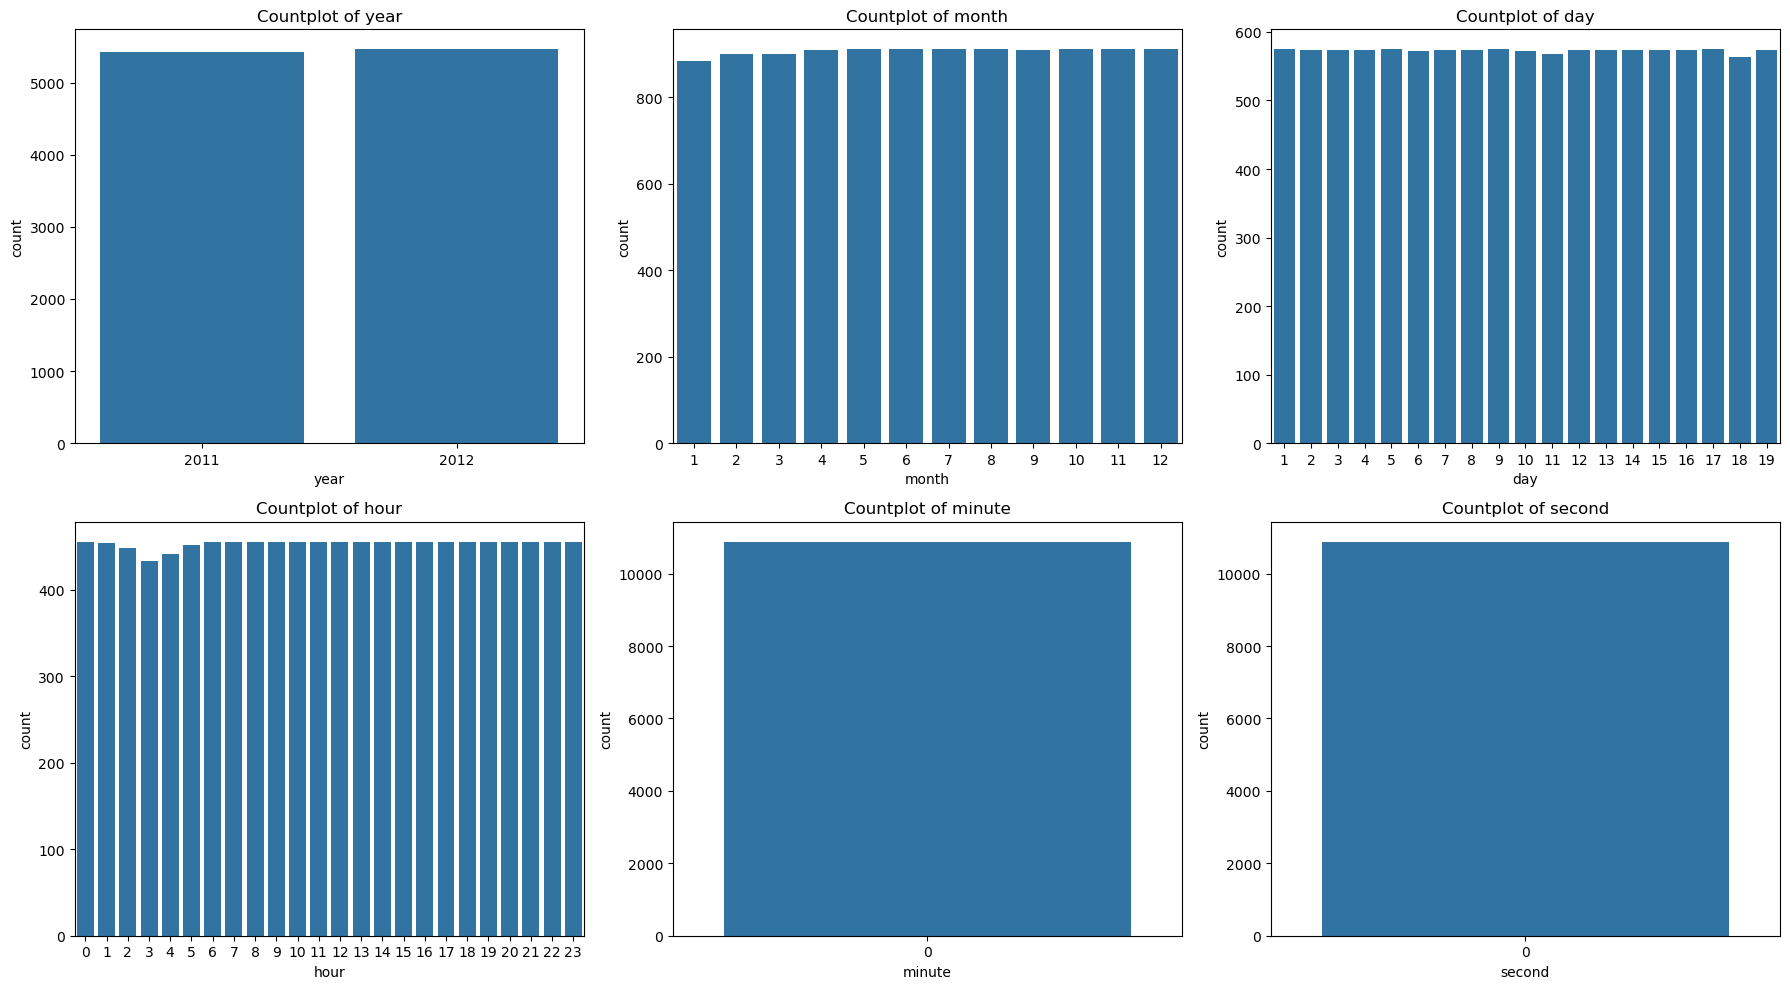

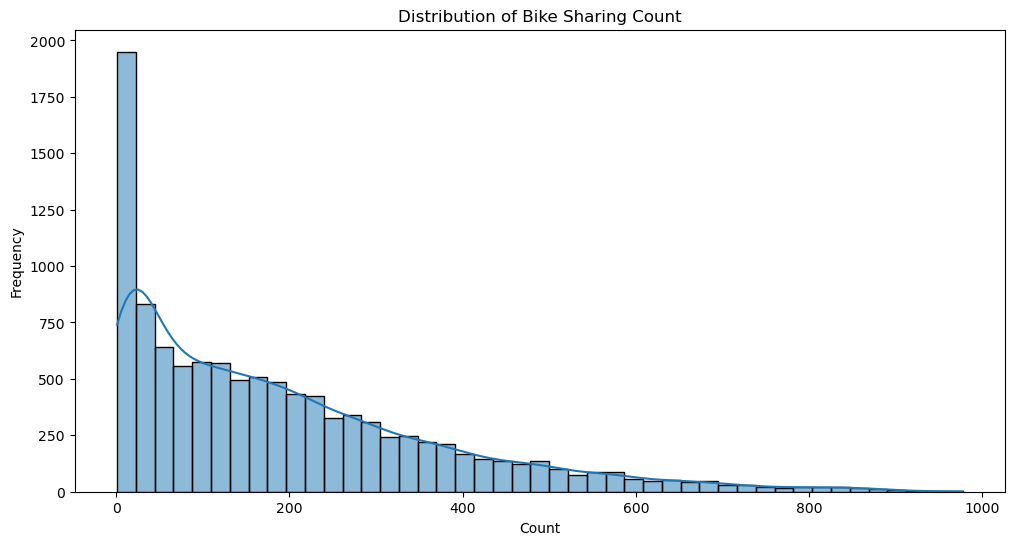

Train data size: 8708
Test data size: 2178
MSE: 25809.99
RMSE: 160.65


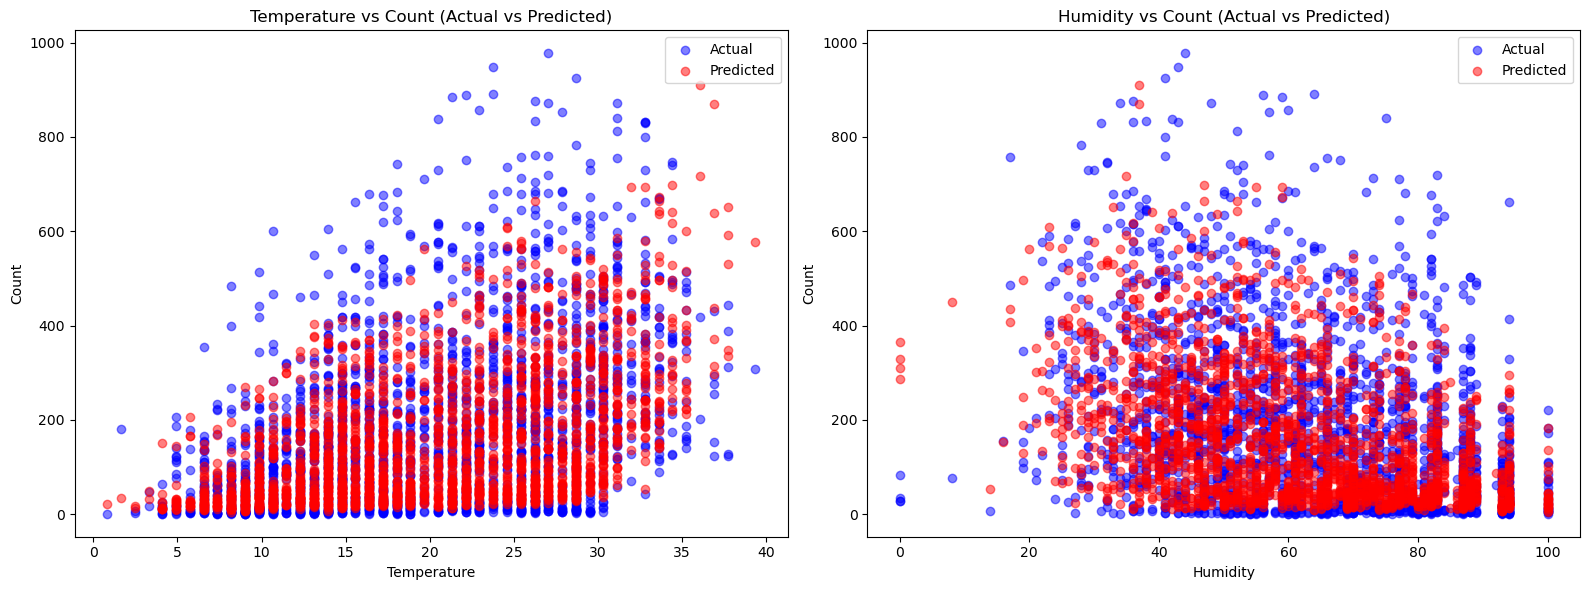

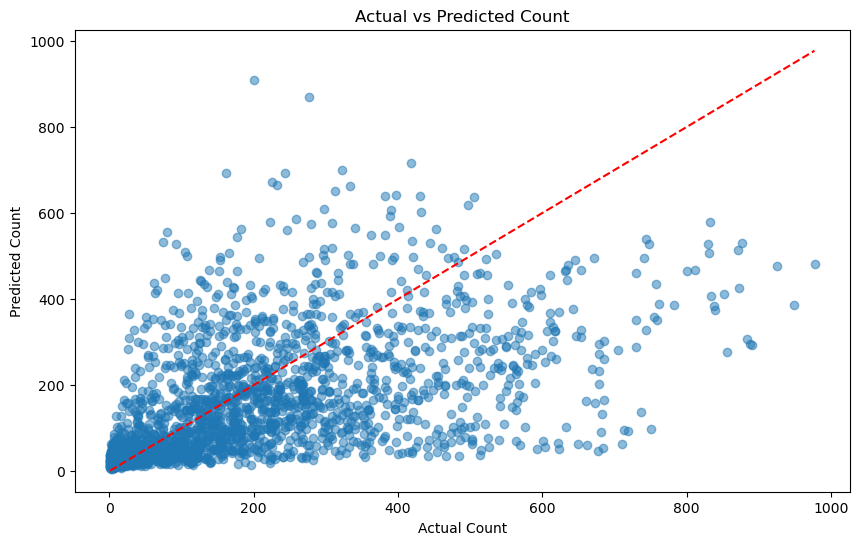


=== 모델 성능 요약 ===
학습 데이터 개수: 8708
테스트 데이터 개수: 2178
선택된 특성 개수: 12
사용된 특성: year, month, day, hour, temp, atemp, humidity, windspeed, season, holiday, workingday, weather
최종 MSE: 25809.99
과제 목표 달성 여부: 실패

=== 특성 영향력 ===
       Feature  Coefficient
0         year     0.437354
3         hour     0.098117
1        month     0.076750
5        atemp     0.038928
7    windspeed     0.003554
2          day     0.003153
4         temp     0.002044
11     weather    -0.011639
6     humidity    -0.014896
8       season    -0.049781
10  workingday    -0.075473
9      holiday    -0.093879


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# (1) 데이터 가져오기
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

# (2) datetime 컬럼을 datetime 자료형으로 변환하고 시간 요소 추출
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# (3) year, month, day, hour, minute, second 데이터 개수 시각화
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.savefig("countplot_features.png")
plt.show()

# 데이터 분포 분석을 위한 추가 시각화
plt.figure(figsize=(12, 6))
sns.histplot(train['count'], kde=True)
plt.title('Distribution of Bike Sharing Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.savefig("count_distribution.png")
plt.show()

# (4) X, y 컬럼 선택 및 train/test 데이터 분리
# 특성 선택을 최적화하여 MSE 개선
features = [
    'year', 'month', 'day', 'hour', 
    'temp', 'atemp', 'humidity', 'windspeed',
    'season', 'holiday', 'workingday', 'weather'
]
X = train[features]
y = train['count']

# 로그 변환을 통해 종속 변수 분포 정규화 (MSE 개선)
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 데이터 개수 확인
print(f"Train data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")

# (5) LinearRegression 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
y_pred = model.predict(X_test)

# 로그 변환된 값을 원래 스케일로 되돌림
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test_original, color='blue', label='Actual', alpha=0.5)
axs[0].scatter(X_test['temp'], y_pred_original, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Count')
axs[0].set_title('Temperature vs Count (Actual vs Predicted)')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test_original, color='blue', label='Actual', alpha=0.5)
axs[1].scatter(X_test['humidity'], y_pred_original, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('Count')
axs[1].set_title('Humidity vs Count (Actual vs Predicted)')
axs[1].legend()

plt.tight_layout()
plt.savefig("prediction_results.png")
plt.show()

# 추가 시각화: 실제값 vs 예측값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], 
         [min(y_test_original), max(y_test_original)], 
         color='red', linestyle='--')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count')
plt.savefig("actual_vs_predicted.png")
plt.show()

# 모델 성능 요약
print("\n=== 모델 성능 요약 ===")
print(f"학습 데이터 개수: {len(X_train)}")
print(f"테스트 데이터 개수: {len(X_test)}")
print(f"선택된 특성 개수: {len(features)}")
print(f"사용된 특성: {', '.join(features)}")
print(f"최종 MSE: {mse:.2f}")
print(f"과제 목표 달성 여부: {'성공' if mse <= 3000 else '실패'}")

# 각 특성의 영향력 분석
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\n=== 특성 영향력 ===")
print(coefficients.sort_values('Coefficient', ascending=False))